In [32]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display, clear_output
from matplotlib.animation import FFMpegWriter

In [33]:
sim = rebound.Simulation()
sim.units = ('AU', 'days', 'Msun')

# We can add Jupiter and four of its moons by name, since REBOUND is linked to the HORIZONS database.
labels = ["Jupiter", "Io", "Europa","Ganymede","Callisto"]
sim.add(labels)

Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Io'... 
Found: Io (501) (chosen from query 'Io')
Searching NASA Horizons for 'Europa'... 
Found: Europa (502) (chosen from query 'Europa')
Searching NASA Horizons for 'Ganymede'... 
Found: Ganymede (503) 
Searching NASA Horizons for 'Callisto'... 
Found: Callisto (504) 


In [34]:
os = sim.calculate_orbits()
print("n_i (in rad/days) = %6.3f, %6.3f, %6.3f" % (os[0].n,os[1].n,os[2].n))
print("P_i (in days)     = %6.3f, %6.3f, %6.3f" % (os[0].P,os[1].P,os[2].P))



n_i (in rad/days) =  3.548,  1.769,  0.878
P_i (in days)     =  1.771,  3.552,  7.153


In [35]:
sim.move_to_com()

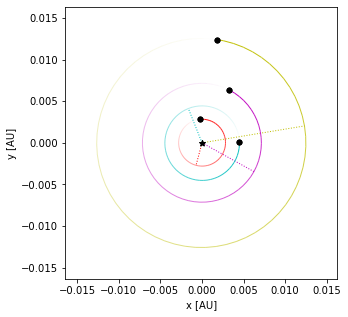

In [51]:
dt = 0.08

op = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True)
#op = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True, xlim=[-2,2], ylim=[-2.5,1.5])

#op1 = rebound.OrbitPlot(sim, particles=[1,3], unitlabel="[AU]", color=True, periastron=True)
#op2 = rebound.OrbitPlot(sim, particles=[2], ax=op1.ax, fig=op1.fig, lw=5, color="red")


fig = op.fig
for i in range(100):
    op.sim.integrate(sim.t + dt)
    op.update()       # update data
    fig.canvas.draw() # redraw figure
    display(fig)
    clear_output(wait=True)

#plt.legend(labels)   
    
    #op.sim.integrate(sim.t + dt)
    #op.update()       # update data
    #fig.canvas.draw() # redraw figure
    #display(fig)
    #clear_output(wait=True)




In [44]:
# = rebound.OrbitPlot(sim, particles=[1,3])
#op2 = rebound.OrbitPlot(sim, particles=[2], ax=op1.ax, fig=op1.fig, lw=5, color="red")

#sim.integrate(sim.t+3.2)
#op1.update()
#op2.update() # red planet orbit
#op1.fig

To record, uncomment below

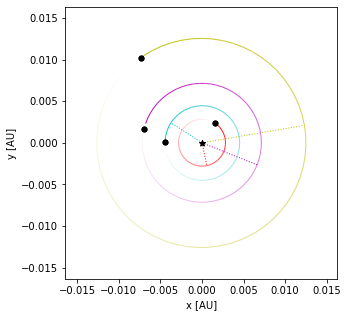

In [45]:
metadata = dict(title='Jupyters moon simulation', artist='Matplotlib', comment=' ')
writer = FFMpegWriter(fps=15, metadata=metadata)

op = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True)
fig = op.fig
with writer.saving(fig, "Jupyter_simulation.mp4", dpi=200):
     for i in range(100):
        op.sim.integrate(sim.t+0.05)
        op.update()       # update data
        fig.canvas.draw() # redraw figure
        display(fig)
        clear_output(wait=True)
        writer.grab_frame()